In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df1 = pd.read_csv("number-with-anxiety-disorders.csv")   
df1.head()

,Entity,Code,Year,Prevalence - Anxiety disorders - Sex: Female - Age: All Ages (Number),Prevalence - Anxiety disorders - Sex: Male - Age: All Ages (Number)
0,Afghanistan,AFG,1990,252379.267264,164475.899445
1,Afghanistan,AFG,1991,262036.445129,170087.377635
2,Afghanistan,AFG,1992,310572.487808,199894.632147
3,Afghanistan,AFG,1993,361936.608315,231159.684414
4,Afghanistan,AFG,1994,376216.938911,238886.225430


In [16]:
df2 = df1[df1["Entity"] == "South Africa"] 
df2.head()

,Entity,Code,Year,Prevalence - Anxiety disorders - Sex: Female - Age: All Ages (Number),Prevalence - Anxiety disorders - Sex: Male - Age: All Ages (Number)
5180,South Africa,ZAF,1990,841765.727058,516547.839828
5181,South Africa,ZAF,1991,863046.773083,529259.786988
5182,South Africa,ZAF,1992,885586.616959,542720.448606
5183,South Africa,ZAF,1993,908802.223797,556529.670945
5184,South Africa,ZAF,1994,932407.630837,570445.008718


In [22]:
df2.tail()

,Entity,Code,Year,Prevalence - Anxiety disorders - Sex: Female - Age: All Ages (Number),Prevalence - Anxiety disorders - Sex: Male - Age: All Ages (Number)
5203,South Africa,ZAF,2013,1.251247e+06,789999.197777
5204,South Africa,ZAF,2014,1.264672e+06,800673.194731
5205,South Africa,ZAF,2015,1.279126e+06,811741.695375
5206,South Africa,ZAF,2016,1.294497e+06,823152.555878
5207,South Africa,ZAF,2017,1.311475e+06,835065.110890


In [12]:
df2.shape

(28, 5)

In [21]:
df2.describe()

,Year,Prevalence - Anxiety disorders - Sex: Female - Age: All Ages (Number),Prevalence - Anxiety disorders - Sex: Male - Age: All Ages (Number)
count,28.000000,2.800000e+01,28.000000
mean,2003.500000,1.123475e+06,689746.386213
std,8.225975,1.438563e+05,95970.907141
min,1990.000000,8.417657e+05,516547.839828
25%,1996.750000,1.009714e+06,612403.647405
50%,2003.500000,1.185663e+06,708198.254087
75%,2010.250000,1.220609e+06,762988.841494
max,2017.000000,1.311475e+06,835065.110890


In [18]:
df2.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence - Anxiety disorders - Sex: Female - Age: All Ages (Number)',
       'Prevalence - Anxiety disorders - Sex: Male - Age: All Ages (Number)'],
      dtype='object')

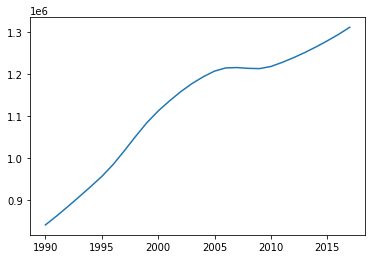

In [19]:
plt.plot(df2.Year,df2["Prevalence - Anxiety disorders - Sex: Female - Age: All Ages (Number)"] )

There is a linear trend, although one with moderate growth.

Model for number of females with anxiety disorders

In [35]:
x = df2.Year
y_values = df2["Prevalence - Anxiety disorders - Sex: Female - Age: All Ages (Number)"]
x_values = x.values.reshape(-1, 1)

In [39]:
# Create training and testing samples
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_values, y_values, test_size = 0.2)

In [41]:
# Create the linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
#Train model
model.fit(x_train, y_train)

LinearRegression()

In [44]:
model.predict(x_test)

array([1087210.87421946, 1254509.99282056, 1287969.81654079,
        919911.75561835,  953371.57933857, 1304699.7284009 ])

In [45]:
model.score(x_test, y_test)

0.9294407699760714

The model is about 92% accurate!!!

In [48]:
x_test = 2030
model.predict([[x_test]])

array([1572378.31816267])

In [46]:
# Save model
import joblib

modelName = 'Anxiety_Females_model.pik'
joblib.dump(model, modelName)

['Anxiety_Females_model.pik']

###Model for number of males with anxiety disorders

In [49]:
y_values = df2["Prevalence - Anxiety disorders - Sex: Male - Age: All Ages (Number)"]

In [50]:
# Create training and testing samples

x_train,x_test,y_train,y_test = train_test_split(x_values, y_values, test_size = 0.2)

In [51]:
# Create the linear model
model2 = LinearRegression()

In [52]:
#Train model
model2.fit(x_train, y_train)

LinearRegression()

In [54]:
model2.score(x_test, y_test)

0.9440480932870472

In [55]:
x_test = 2030
model2.predict([[x_test]])

array([994271.46152])

In [56]:
# Save model

modelName = 'Anxiety_Males_model.pik'
joblib.dump(model, modelName)

['Anxiety_Males_model.pik']